In [1]:
import tensorflow as tf
from tensorflow import keras

2024-05-05 11:00:15.248449: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-05 11:00:15.248761: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 11:00:15.250883: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 11:00:15.277546: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 11:00:15.754593: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
from keras.datasets import mnist
from matplotlib import pyplot

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


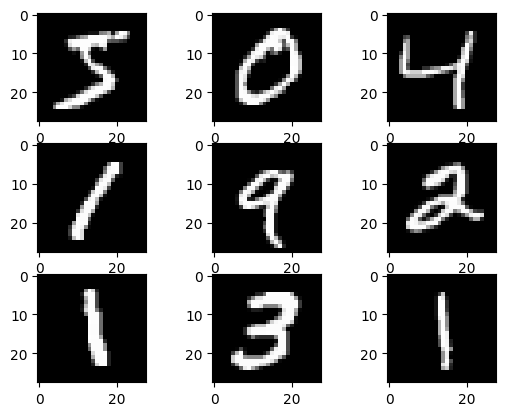

In [3]:
#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()
 
#shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
 
#plotting
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [5]:
import pandas as pd
import seaborn as sns

In [6]:
train_X = pd.DataFrame(train_X.reshape(60000, 784))
train_y = pd.DataFrame(train_y)
test_X = pd.DataFrame(test_X.reshape(10000, 784))
test_y = pd.DataFrame(test_y)

In [7]:
train_y.value_counts()

0
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

# Performing GrayScale Normalization

In [8]:
# grayscale normalization
train_X = train_X / 255.0
test_X = test_X / 255.0

# Reshaping

In [9]:
# reshaping to 3d matrix
train_X = train_X.values.reshape(-1,28,28,1)
test_X = test_X.values.reshape(-1,28,28,1)

# Label Encoding

In [10]:
from keras.utils import to_categorical
train_y = to_categorical(train_y, num_classes=10)

In [11]:
# splitting train and validation set
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size = 0.1, random_state=42)

In [12]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_val:   '  + str(val_X.shape))
print('Y_val:   '  + str(val_y.shape))

X_train: (54000, 28, 28, 1)
Y_train: (54000, 10)
X_val:   (6000, 28, 28, 1)
Y_val:   (6000, 10)


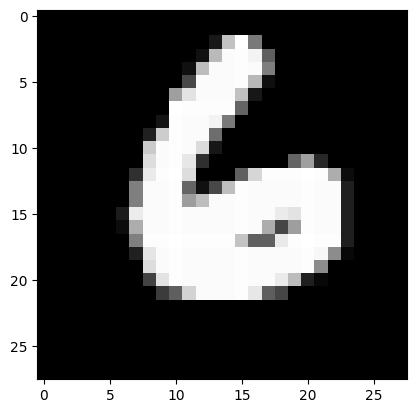

In [13]:
pyplot.imshow(train_X[2][:,:,0], cmap='gray')
pyplot.show()

# Building the Model with Keras

In [17]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(filters = 8, 
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu', 
                 input_shape = (28,28,1)
                 ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16,
                 kernel_size = (3,3),
                 padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))

/home/uniqueusman/TechUp/myenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [21]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [22]:
epochs = 10
batch_size = 250

# Data Augmentation

In [25]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=5,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False)

datagen.fit(train_X)

# Fitting the Model

In [27]:
history = model.fit(datagen.flow(train_X,train_y, batch_size=batch_size),
                              epochs = epochs, validation_data = (val_X,val_y),
                              steps_per_epoch=train_X.shape[0] // batch_size)

Epoch 1/10


/home/uniqueusman/TechUp/myenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


216/216 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.5400 - loss: 1.3457 - val_accuracy: 0.9517 - val_loss: 0.1657
Epoch 2/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9517 - val_loss: 0.1657
Epoch 3/10


2024-05-05 11:06:54.025016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


216/216 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.8926 - loss: 0.3422 - val_accuracy: 0.9758 - val_loss: 0.0866
Epoch 4/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9758 - val_loss: 0.0866
Epoch 5/10


2024-05-05 11:07:01.179271: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


216/216 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9263 - loss: 0.2363 - val_accuracy: 0.9805 - val_loss: 0.0694
Epoch 6/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9805 - val_loss: 0.0694
Epoch 7/10


2024-05-05 11:07:08.243390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


216/216 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9402 - loss: 0.1885 - val_accuracy: 0.9822 - val_loss: 0.0610
Epoch 8/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9822 - val_loss: 0.0610
Epoch 9/10


2024-05-05 11:07:15.292900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


216/216 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9480 - loss: 0.1678 - val_accuracy: 0.9848 - val_loss: 0.0522
Epoch 10/10
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9848 - val_loss: 0.0522


2024-05-05 11:07:22.368313: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


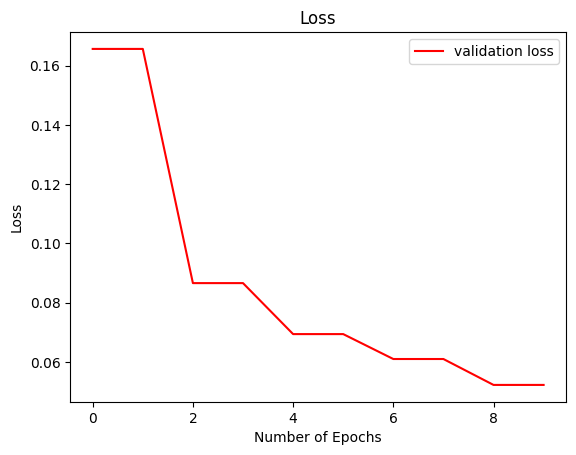

In [28]:
pyplot.plot(history.history['val_loss'], color='r', label='validation loss')
pyplot.title("Loss")
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Loss")
pyplot.legend() 
pyplot.show()

In [29]:
import numpy as np

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


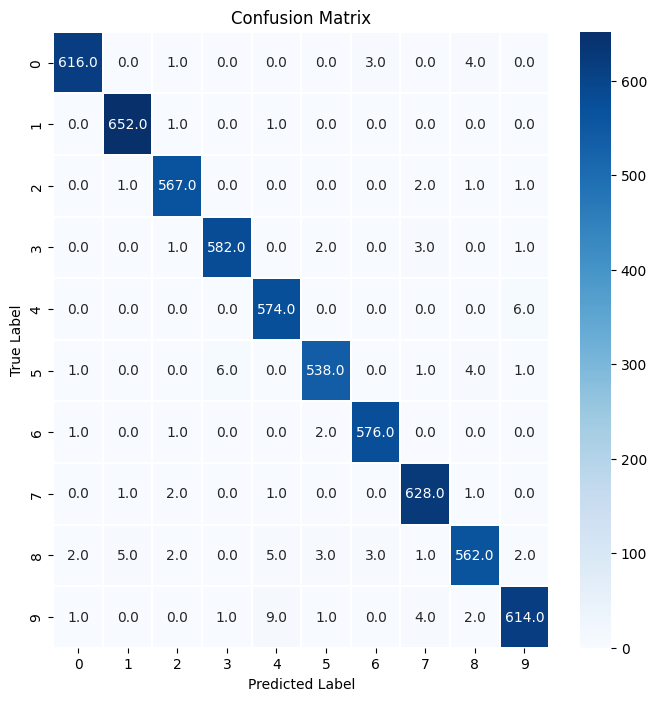

In [30]:
y_pred = model.predict(val_X)   
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(val_y,axis = 1)
cm = confusion_matrix(y_true, y_pred_classes)

f,ax = pyplot.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Blues", fmt= '.1f',ax=ax)
pyplot.xlabel("Predicted Label")
pyplot.ylabel("True Label")
pyplot.title("Confusion Matrix")
pyplot.show()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       624
           1       0.99      1.00      0.99       654
           2       0.99      0.99      0.99       572
           3       0.99      0.99      0.99       589
           4       0.97      0.99      0.98       580
           5       0.99      0.98      0.98       551
           6       0.99      0.99      0.99       580
           7       0.98      0.99      0.99       633
           8       0.98      0.96      0.97       585
           9       0.98      0.97      0.98       632

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



# Subjective Questions

How many layers in the deep neural network were used for features extraction? How many for features classification? 

- 2 Convo2D layers were used for features extraction, each followed by a MaxPool2D layer. 
- 1 Flatten Layer followed by 2 Dense Layers were used for features classification.

How many kernels were used to extract features on the MNIST images? What were the sizes of these kernels?

- The first Convo2D layer used 8 kernels with a kernel size of 5x5. 
- The second Convo2D layer used 16 kernels with a kernel size of 3x3.

What kind of pooling was done on the data? What was the use of pooling? 

- Max Pooling with a pool size of 2x2 was used in both MaxPool2D layers.
- Pooling is used to reduce the dimensionality of the data and computation in the network. It is also used to make the model more robust to slight changes in the input data (making the detection of features invariant to scale and orientation changes). Max pooling takes the maximum value from a set of values, reducing the spatial dimensions while retaining important features.

What were the dimensions of the features set for each layer of the deep CNN? Why were the dimensions reducing in each layer?

- The dimensions of the features set for each layer of the deep CNN are as follows:
    - With the input dimensions being 28x28x1
    - The first Convo2D layer outputs 24x24x8
    - The first MaxPool2D layer outputs 14x14x8
    - The second Convo2D layer outputs 14x14x16
    - The second MaxPool2D layer outputs 7x7x16
    - The Flatten layer outputs 784
    - The first Dense layer outputs 256
    - The second Dense layer outputs 10
- The dimensions are reducing in each layer because of the pooling layer and flattening layer. The pooling layer reduces the dimensionality of the data by taking the maximum value of a 2x2 matrix. The flattening layer flattens the data into a 1D array.

How are the outputs of CNN (which are numbers) .i.e. activation outputs of the last layer converted to probabilities and 10 classes (for the 10 digits)?

- The activation function used in the last Dense layer is SOFTMAX. Softmax converts the raw scores (logits) into probabilities. Each output neuron represents the probability of the input image belonging to a particular class (0 to 9 in this case). The class with the highest probability is considered as the predicted class.